<a href="https://colab.research.google.com/github/kevirui/Clasificacion-de-modelos-y-metricas/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definiendo datos y ejes

In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/kevirui/Clasificacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv")
data

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [2]:
x = data.drop(columns='diabetes', axis=1)
y = data['diabetes']

# Determinando ejes de entrenamiento, validación y de prueba

In [3]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size=0.05, stratify=y, random_state=42)
x_val, x_train, y_val, y_train = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth=3)
forest = RandomForestClassifier(max_depth=2)

tree.fit(x_train, y_train)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

In [5]:
tree.score(x_train, y_train)

0.8404255319148937

In [6]:
tree.score(x_val, y_val)

0.6178571428571429

In [7]:
forest.score(x_train, y_train)

0.8617021276595744

In [8]:
forest.score(x_val, y_val)

0.7035714285714286

# Matrices de Confusión para evaluar predicciones de cada modelo

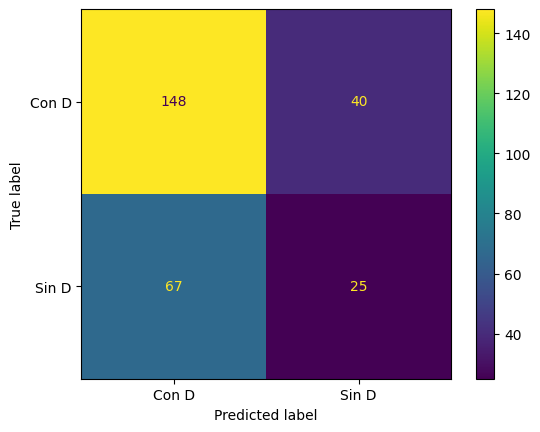

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, tree.predict(x_val), display_labels=['Con D', 'Sin D'])

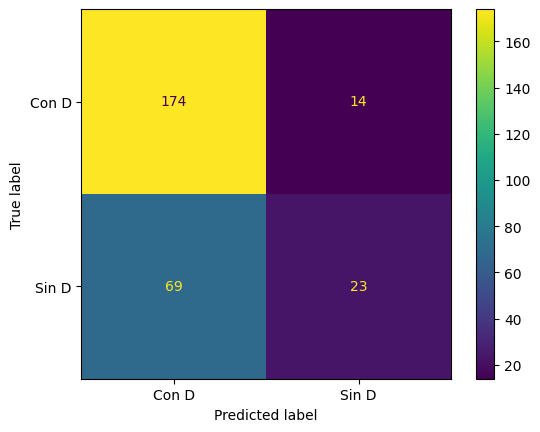

In [10]:
ConfusionMatrixDisplay.from_predictions(y_val, forest.predict(x_val), display_labels=['Con D', 'Sin D'])

# Evaluando metricas

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"La exactitud del tree model es: {accuracy_score(y_val, tree.predict(x_val))}")
print(f"La precisión del tree model es: {precision_score(y_val, tree.predict(x_val))}")
print(f"La sensibilidad del tree model es: {recall_score(y_val, tree.predict(x_val))}")
print(f"El F1 score del tree model es: {f1_score(y_val, tree.predict(x_val))}")
print("--------o---------")
print(f"La exactitud del forest model es: {accuracy_score(y_val, forest.predict(x_val))}")
print(f"La precisión del forest model es: {precision_score(y_val, forest.predict(x_val))}")
print(f"La sensibilidad del forest model es: {recall_score(y_val, forest.predict(x_val))}")
print(f"El F1 score del forest model es: {f1_score(y_val, forest.predict(x_val))}")

La exactitud del tree model es: 0.6178571428571429
La precisión del tree model es: 0.38461538461538464
La sensibilidad del tree model es: 0.2717391304347826
El F1 score del tree model es: 0.3184713375796178
--------o---------
La exactitud del forest model es: 0.7035714285714286
La precisión del forest model es: 0.6216216216216216
La sensibilidad del forest model es: 0.25
El F1 score del forest model es: 0.35658914728682173


In [12]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

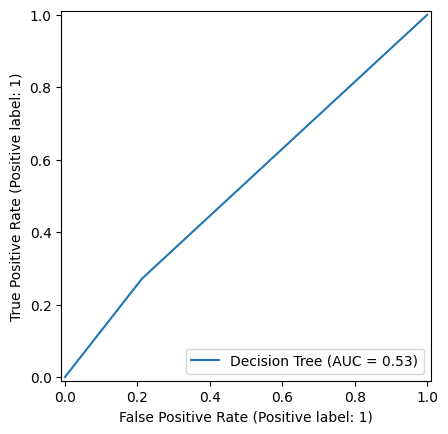

In [13]:
RocCurveDisplay.from_predictions(y_val, tree.predict(x_val), name='Decision Tree')

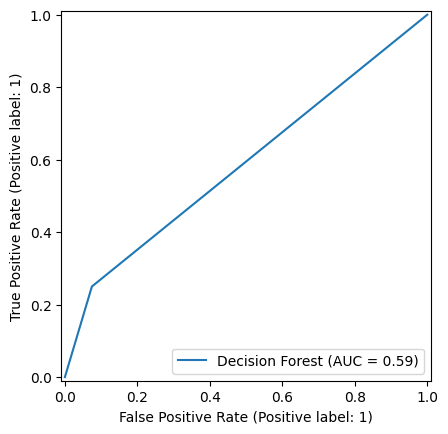

In [14]:
RocCurveDisplay.from_predictions(y_val, forest.predict(x_val), name='Decision Forest')

In [15]:
print(f"The area under ROC courve on Tree model: {roc_auc_score(y_val, tree.predict(x_val))}")
print(f"The area under ROC courve on Forest model: {roc_auc_score(y_val, forest.predict(x_val))}")

The area under ROC courve on Tree model: 0.529486586493987
The area under ROC courve on Forest model: 0.5877659574468085


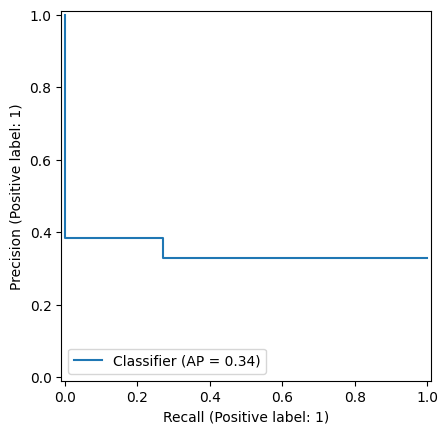

In [16]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_predictions(y_val, tree.predict(x_val));

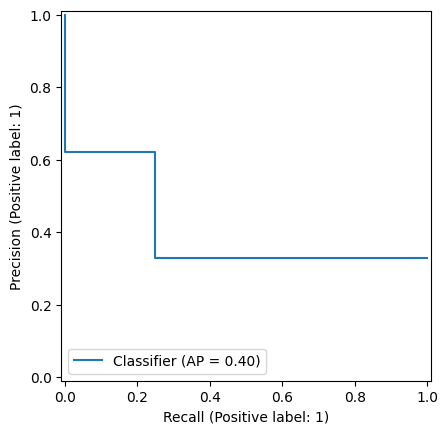

In [17]:
PrecisionRecallDisplay.from_predictions(y_val, forest.predict(x_val));

In [18]:
print(f"El score promedio de precisión vs recall en Tree Model es: {average_precision_score(y_val, tree.predict(x_val))}")

El score promedio de precisión vs recall en Tree Model es: 0.3438007644529384


In [19]:
print(f"El score promedio de precisión vs recall en Forest Model es: {average_precision_score(y_val, forest.predict(x_val))}")

El score promedio de precisión vs recall en Forest Model es: 0.4018339768339768


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_val, tree.predict(x_val)))
print(classification_report(y_val, forest.predict(x_val)))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73       188
           1       0.38      0.27      0.32        92

    accuracy                           0.62       280
   macro avg       0.54      0.53      0.53       280
weighted avg       0.59      0.62      0.60       280

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       188
           1       0.62      0.25      0.36        92

    accuracy                           0.70       280
   macro avg       0.67      0.59      0.58       280
weighted avg       0.69      0.70      0.66       280



# Definiciones cruzadas

In [21]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

kf = KFold(n_splits=10, shuffle=True, random_state=5)
resultados_tree = cross_val_score(tree, x, y, cv=kf)
resultados_forest = cross_val_score(forest, x, y, cv=kf)

def intervalo_confianza(resultado, modelo):
  media = resultado.mean()
  std = resultado.std()
  print(f"Intervalo de confianza ({modelo}): [{media-2*std}, {min(media+2*std, 1)}]")

In [22]:
intervalo_confianza(resultados_tree, 'Decision Tree')
intervalo_confianza(resultados_forest, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.517621827720011, 0.8764037768319094]
Intervalo de confianza (Random Forest): [0.5336665259589974, 0.8340432891192386]


In [23]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados_tree = cross_val_score(tree, x, y, cv=skf, scoring='f1')
resultados_forest = cross_val_score(forest, x, y, cv=skf, scoring='f1')

intervalo_confianza(resultados_tree, 'Decision Tree')
intervalo_confianza(resultados_forest, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.34475350305254676, 0.7104586665474946]
Intervalo de confianza (Random Forest): [0.23984803661677453, 0.5194620031886212]


In [24]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
resultados_tree = cross_val_score(tree, x, y, cv=loo)
resultados_forest = cross_val_score(forest, x, y, cv=loo)

print(f"Precisión media (Decision Tree): {resultados_tree.mean()}")
print(f"Precisión media (Random Forest): {resultados_forest.mean()}")

Precisión media (Decision Tree): 0.7085561497326203
Precisión media (Random Forest): 0.7005347593582888


# Balanceo de datos

## Análisis de desbalanceo

In [35]:
data['diabetes'].value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


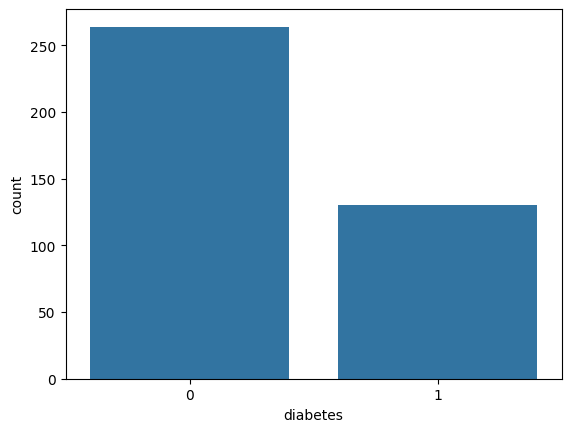

In [37]:
import seaborn as sns

sns.countplot(data, x = 'diabetes');

## OverSampling

In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_validate

pipelineT = imbpipeline([('oversampler', SMOTE() ), ('Decision Tree', tree)])
pipelineF = imbpipeline([('oversampler', SMOTE() ), ('Random Forest', forest)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados_tree = cross_val_score(pipelineT, x, y, cv=skf, scoring='f1')
resultados_forest = cross_val_score(pipelineF, x, y, cv=skf, scoring='f1')

print(f"F1 (Decision Tree): {resultados_tree.mean()}")
print(f"F1 (Random Forest): {resultados_forest.mean()}")

F1 (Decision Tree): 0.5617503791210687
F1 (Random Forest): 0.6151081005051594


## UnderSampling

In [41]:
from imblearn.under_sampling import NearMiss

pipelineT = imbpipeline([('undersampler', NearMiss(version=3) ), ('Decision Tree', tree)])
pipelineF = imbpipeline([('undersampler', NearMiss(version=3) ), ('Random Forest', forest)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados_tree = cross_val_score(pipelineT, x, y, cv=skf, scoring='f1')
resultados_forest = cross_val_score(pipelineF, x, y, cv=skf, scoring='f1')

print(f"F1 (Decision Tree): {resultados_tree.mean()}")
print(f"F1 (Random Forest): {resultados_forest.mean()}")

F1 (Decision Tree): 0.5441132755629126
F1 (Random Forest): 0.6038111128767414


# Probando modelos


              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.43      0.43      0.43         7

    accuracy                           0.60        20
   macro avg       0.56      0.56      0.56        20
weighted avg       0.60      0.60      0.60        20



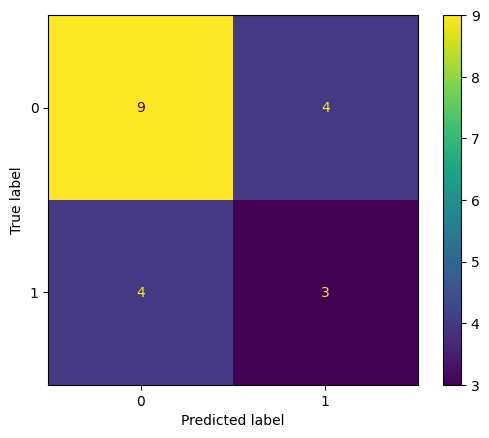

In [42]:
# Mejor modelo
undersample = NearMiss(version = 3)
x_balanced, y_balanced = undersample.fit_resample(x, y)

forest.fit(x_balanced, y_balanced)
y_previsto = forest.predict(x_test)

print(classification_report(y_test, y_previsto))

ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);